In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Syafi.san\Documents\Book2.csv', sep=';')
df.head()

,susu murni,air,Resistansi,Label
0,100,0,0.803,susu murni
1,100,0,0.948,susu murni
2,100,0,0.966,susu murni
3,100,0,0.821,susu murni
4,100,0,0.952,susu murni


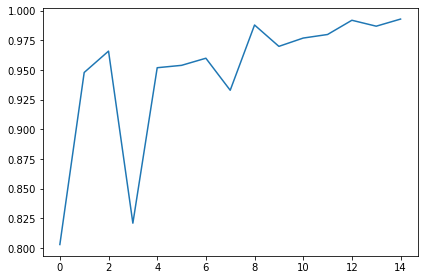

In [3]:
#plot dari sampel susu 100 air 0 pada semua percobaan
df['Resistansi'].iloc[:15].plot()
plt.tight_layout()

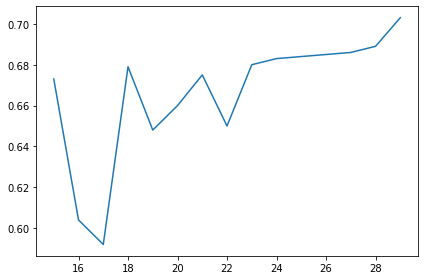

In [4]:
#plot dari sampel susu 50 air 50 pada semua percobaan
df['Resistansi'].iloc[15:].plot()
plt.tight_layout()

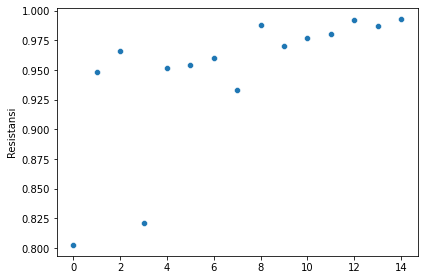

In [5]:
#scatterplot dari sampel susu 100 ml dan air 0 ml  
sns.scatterplot(data=df['Resistansi'].iloc[:15])
plt.tight_layout()

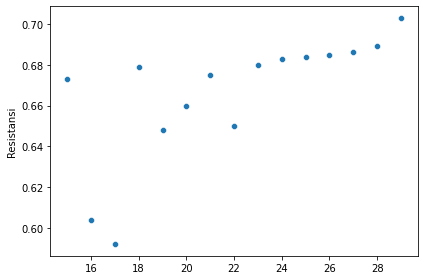

In [6]:
#scatterplot dari sampel susu 50 ml dan air 50 ml  
sns.scatterplot(data=df['Resistansi'].iloc[15:])
plt.tight_layout()

In [16]:
#nilai rata2 dari data susu 100 ml air 0 ml
mean_susu100air0 = df['Resistansi'].iloc[:15].mean()
mean_susu100air0

0.9482666666666667

In [17]:
#nilai rata2 dari data susu 100 ml air 50 ml
mean_susu50air50 = df['Resistansi'].iloc[15:].mean()
mean_susu50air50

0.6660666666666667

In [ ]:
#menentukan data dari dataset menjadi X dan y

In [4]:
X = df.drop(['Label'], axis=1)
X.head()

,susu murni,air,Resistansi
0,100,0,0.803
1,100,0,0.948
2,100,0,0.966
3,100,0,0.821
4,100,0,0.952


In [5]:
y = df['Label']
y.head()

0    susu murni
1    susu murni
2    susu murni
3    susu murni
4    susu murni
Name: Label, dtype: object

In [ ]:
#Splitting data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=10)
print("Dimensi data :\n")
print("X train \t X test \t Y train \t Y test")  
print("%s \t %s \t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Dimensi data :

X train 	 X test 	 Y train 	 Y test
(24, 3) 	 (6, 3) 	 (24,) 	 (6,)


In [11]:
#mengoperasikan KNN Method
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 25)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


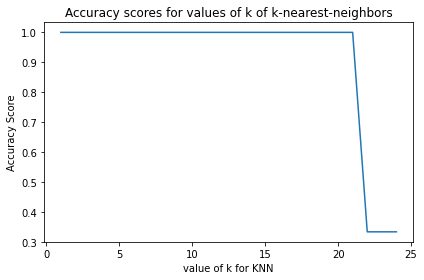

In [12]:
#plot hasil KNN
plt.plot(k_range, scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy scores for values of k of k-nearest-neighbors')
plt.tight_layout()
plt.show()

In [13]:
##mencari accuracy_score, confusion_matrix dan classification_report dengan menggunakan LogisticRegression
from sklearn.linear_model import LogisticRegression

In [14]:
model_logreg = LogisticRegression(solver='liblinear', multi_class='auto')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

In [15]:
#print accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [16]:
#print confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2 0]
 [0 4]]


In [17]:
#print classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

susu campuran       1.00      1.00      1.00         2
   susu murni       1.00      1.00      1.00         4

     accuracy                           1.00         6
    macro avg       1.00      1.00      1.00         6
 weighted avg       1.00      1.00      1.00         6



In [ ]:
#mencari accuracy_score, confusion_matrix dan classification_report dengan menggunakan SVC

In [18]:
#SVC
from sklearn.svm import SVC

model_svc = SVC(gamma='scale')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

In [19]:
print(accuracy_score(y_test, y_pred))

1.0


In [20]:
print(confusion_matrix(y_test, y_pred))

[[2 0]
 [0 4]]


In [21]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

susu campuran       1.00      1.00      1.00         2
   susu murni       1.00      1.00      1.00         4

     accuracy                           1.00         6
    macro avg       1.00      1.00      1.00         6
 weighted avg       1.00      1.00      1.00         6

